# Pythonチャレンジ: 地震データを探る

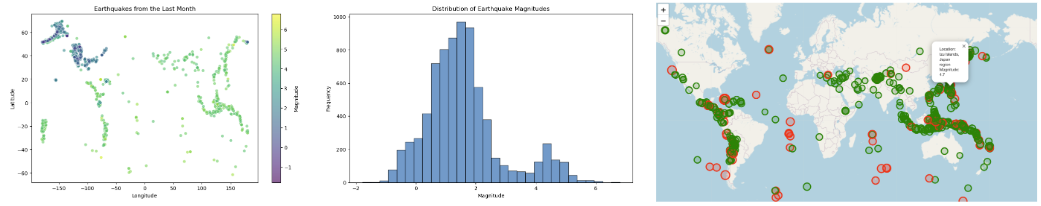

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

In [7]:
%pip install pandas requests


   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   -------- ------------------------------- 1/5 [idna]
   -------- ------------------------------- 1/5 [idna]
   ---------------- ----------------------- 2/5 [charset_normalizer]
   ---------------- ----------------------- 2/5 [charset_normalizer]
   ------------------------ --------------- 3/5 [certifi]
   -------------------------------- ------- 4/5 [requests]
   -------------------------------- ------- 4/5 [requests]
   -------------------------------- ------- 4/5 [requests]
   ---------------------------------------- 5/5 [requests]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### リクエストコード例

In [16]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

import pandas as pd
import matplotlib.pyplot as plt
# requests, dataの読み込み部分は省略しますが、実行前に準備が必要です。
# 例: data = pd.read_csv('earthquakes.csv')
%pip install matplotlib

ModuleNotFoundError: No module named 'matplotlib'

## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [10]:

# ⑥ 過去1か月の地震の総数
total = len(data)
print(f"\n過去1か月の地震の総数: {total}")

# ⑦ 最大マグニチュードとその場所・日時
max_mag = data['mag'].max()
max_quake = data.loc[data['mag'].idxmax()]
print(f"\n最大マグニチュード: {max_mag}")
print(f"発生場所: {max_quake['place']}")
print(f"発生日時: {max_quake['time']}")

# ⑧ 「日本」で発生した地震の数
japan_quakes = data[data['place'].str.contains('Japan', case=False, na=False)]
print(f"\n日本での地震の数: {len(japan_quakes)}")



過去1か月の地震の総数: 7624

最大マグニチュード: 7.6
発生場所: Drake Passage
発生日時: 2025-10-10T20:29:20.591Z

日本での地震の数: 50


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [11]:

major_earthquakes = data[data['mag'] > 6.0].copy()

# 結果を格納するリスト
major_quake_details = []

print("=== チャレンジ2：マグニチュード6.0を超える地震 ===")
print(f"総数: {len(major_earthquakes)} 件")
print("-" * 30)

# forループを使ってリストアップ
for index, row in major_earthquakes.iterrows():
    # 発生時刻(time)、緯度(latitude)、経度(longitude)、マグニチュード(mag)を取得
    time = row['time']
    mag = row['mag']
    lat = row['latitude']
    lon = row['longitude']
    
    # 情報を整形して出力
    detail = f"時刻: {time}, マグニチュード: {mag:.1f}, 位置: ({lat:.2f}, {lon:.2f})"
    major_quake_details.append(detail)
    
    print(detail)

print("-" * 30)
print(f"重要な地震の総数: {len(major_quake_details)} 件")

=== チャレンジ2：マグニチュード6.0を超える地震 ===
総数: 14 件
------------------------------
時刻: 2025-11-03T08:44:43.471Z, マグニチュード: 6.1, 位置: (52.19, 160.42)
時刻: 2025-11-02T20:29:02.028Z, マグニチュード: 6.3, 位置: (36.59, 67.48)
時刻: 2025-10-28T14:40:18.476Z, マグニチュード: 6.4, 位置: (-6.74, 130.02)
時刻: 2025-10-27T12:38:40.311Z, マグニチュード: 6.5, 位置: (16.53, -59.57)
時刻: 2025-10-26T17:04:25.645Z, マグニチュード: 6.2, 位置: (-8.87, 123.95)
時刻: 2025-10-16T23:03:16.195Z, マグニチュード: 6.1, 位置: (9.76, 126.11)
時刻: 2025-10-16T05:48:55.452Z, マグニチュード: 6.5, 位置: (-2.17, 138.94)
時刻: 2025-10-16T01:42:32.850Z, マグニチュード: 6.3, 位置: (-59.91, -61.62)
時刻: 2025-10-10T20:29:20.591Z, マグニチュード: 7.6, 位置: (-60.20, -61.80)
時刻: 2025-10-10T11:12:07.106Z, マグニチュード: 6.7, 位置: (7.17, 126.76)
時刻: 2025-10-10T02:08:10.703Z, マグニチュード: 6.3, 位置: (-3.03, 147.97)
時刻: 2025-10-10T01:43:59.585Z, マグニチュード: 7.4, 位置: (7.29, 126.69)
時刻: 2025-10-09T13:28:45.412Z, マグニチュード: 6.1, 位置: (51.72, 158.20)
時刻: 2025-10-07T11:05:17.691Z, マグニチュード: 6.6, 位置: (-6.76, 146.81)
------------------------------
重要な

**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [ ]:


# 'depth'列が深度（Depth）です。（単位はおそらくkm）

# 1. すべての地震の平均深度を計算
# 'depth'列の平均を計算します
average_depth = data['depth'].mean()

print("\n=== チャレンジ3：地震の深さを分析 ===")
print(f"すべての地震の平均深度: {average_depth:.2f} km")
print("-" * 30)

# 2. 地震をカテゴリに分類し、それぞれの数を数える
# 地震の深度（depth）を基準にフィルタリング

# 浅い地震 (<70 km)
shallow_quakes = data[data['depth'] < 70]
count_shallow = len(shallow_quakes)

# 中間深度地震 (70–300 km)
# 70 km <= depth <= 300 km
intermediate_quakes = data[(data['depth'] >= 70) & (data['depth'] <= 300)]
count_intermediate = len(intermediate_quakes)

# 深い地震 (>300 km)
deep_quakes = data[data['depth'] > 300]
count_deep = len(deep_quakes)

print("--- 深度別 地震の数 ---")
print(f"浅い地震 (< 70 km):           {count_shallow} 件")
print(f"中間深度地震 (70 - 300 km):    {count_intermediate} 件")
print(f"深い地震 (> 300 km):         {count_deep} 件")
print("-" * 30)

# 合計が元のデータの総数と一致するか確認
total_categorized = count_shallow + count_intermediate + count_deep
print(f"分類された合計: {total_categorized} 件 (元のデータ総数: {len(data)} 件)")


=== チャレンジ3：地震の深さを分析 ===
すべての地震の平均深度: 21.06 km
------------------------------
--- 深度別 地震の数 ---
浅い地震 (< 70 km):           7049 件
中間深度地震 (70 - 300 km):    515 件
深い地震 (> 300 km):         60 件
------------------------------
分類された合計: 7624 件 (元のデータ総数: 7624 件)


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [22]:
import pandas as pd

# ⚠️ 注意: この行の前に、'earthquakes.csv' を読み込む処理が必要です
# 例: data = pd.read_csv('earthquakes.csv')

print("\n=== チャレンジ4：時間分析 ===")

# 1. タイムスタンプを人が読みやすい形式に変換し、日本時間 (JST: UTC+9) に変換
# 'time'列が日付時刻の文字列形式（例: '2025-11-05T05:43:22.785Z'）であることを前提として、
# 'unit=' の指定を削除し、文字列として直接解析させます。
# 'utc=True' は、元の文字列がUTC時間であることを示します。

data['datetime_utc'] = pd.to_datetime(data['time'], utc=True)

# タイムゾーンを日本時間 (JST) に変換 (UTC+9)
data['datetime_jst'] = data['datetime_utc'].dt.tz_convert('Asia/Tokyo')

print("✅ タイムスタンプの変換が完了しました。")
print(f"\n最初の5つの日本時間表示:\n{data['datetime_jst'].head()}")
print("-" * 30)

# 2. データセット内の最も早い地震と最新の地震の発生時刻を見つける
# 'datetime_jst'列の最小値(min)と最大値(max)を計算します。
earliest_quake = data['datetime_jst'].min()
latest_quake = data['datetime_jst'].max()

print("--- 地震の発生期間 ---")
print(f"最も早い地震の発生時刻 (JST): {earliest_quake}")
print(f"最新の地震の発生時刻 (JST): {latest_quake}")
print("-" * 30)


=== チャレンジ4：時間分析 ===
✅ タイムスタンプの変換が完了しました。

最初の5つの日本時間表示:
0   2025-11-05 14:43:22.785000+09:00
1   2025-11-05 14:41:14.967000+09:00
2   2025-11-05 14:29:06.697000+09:00
3   2025-11-05 14:28:48.472000+09:00
4   2025-11-05 14:16:22.542000+09:00
Name: datetime_jst, dtype: datetime64[ns, Asia/Tokyo]
------------------------------
--- 地震の発生期間 ---
最も早い地震の発生時刻 (JST): 2025-10-06 14:54:48.070000+09:00
最新の地震の発生時刻 (JST): 2025-11-05 14:43:22.785000+09:00
------------------------------


**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 10.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 10.3 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 10.3 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.9 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.1/7.0 MB 10.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.0 MB 10.5 MB/s eta 0:00:01
   ------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



=== チャレンジ5：地震のマグニチュードを可視化 ===


c:\Users\ryoya\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\ryoya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ryoya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ryoya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ryoya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyp

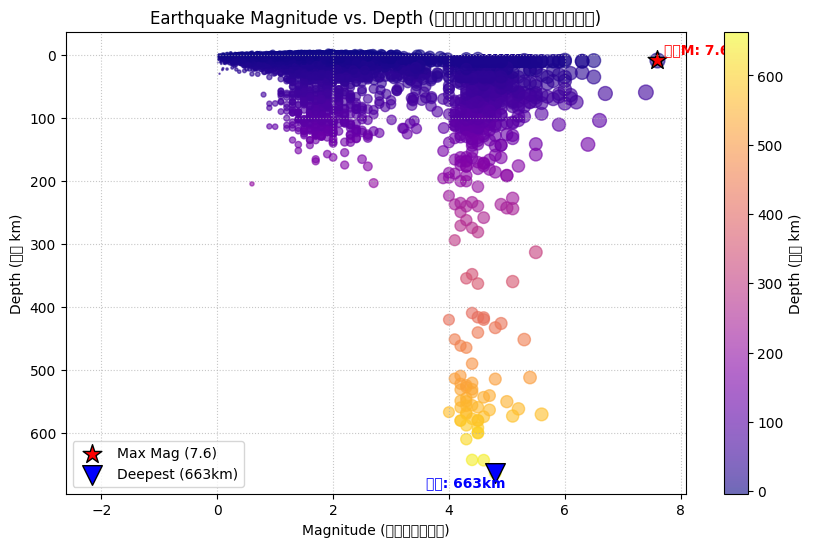

In [28]:

# Jupyter Notebook/Labのコードセルで実行する場合
!pip install requests matplotlib 

import pandas as pd
import matplotlib.pyplot as plt

# ⚠️ 注意: このコードを実行する前に、
# 1. matplotlibライブラリをインストールしてください (pip install matplotlib)
# 2. 'data'という変数に地震データが読み込まれていることを確認してください
#    例: data = pd.read_csv('earthquakes.csv')

print("\n=== チャレンジ5：地震のマグニチュードを可視化 ===")

# 1. 最大の地震 (マグニチュード) と最も深い地震を見つける
# マグニチュード(mag)が最大の行を取得
max_mag_quake = data.loc[data['mag'].idxmax()]
# 深さ(depth)が最大の行を取得 (depthが大きいほど深い)
max_depth_quake = data.loc[data['depth'].idxmax()]

# 2. 散布図の作成
plt.figure(figsize=(10, 6))

# 一般的な地震データをプロット
# s=マグニチュードに比例させて点のサイズを変え、c=深さで色分け
plt.scatter(data['mag'], data['depth'], s=data['mag'] * 15, alpha=0.6, c=data['depth'], cmap='plasma')

# カラーバーの追加 (色の意味：深さ)
plt.colorbar(label='Depth (深さ km)')

# ラベルとタイトルの設定
plt.xlabel('Magnitude (マグニチュード)')
plt.ylabel('Depth (深さ km)')
plt.title('Earthquake Magnitude vs. Depth (地震のマグニチュードと深さの関係)')
plt.grid(True, linestyle=':', alpha=0.7)

# 3. 最大の地震にラベルを追加
plt.scatter(max_mag_quake['mag'], max_mag_quake['depth'], 
            color='red', s=200, marker='*', edgecolors='black', 
            label=f"Max Mag ({max_mag_quake['mag']:.1f})")
plt.annotate(f"最大M: {max_mag_quake['mag']:.1f}", 
             (max_mag_quake['mag'], max_mag_quake['depth']),
             textcoords="offset points", xytext=(5, 5), fontsize=10, color='red', weight='bold')

# 4. 最も深い地震にラベルを追加
plt.scatter(max_depth_quake['mag'], max_depth_quake['depth'], 
            color='blue', s=200, marker='v', edgecolors='black', 
            label=f"Deepest ({max_depth_quake['depth']:.0f}km)")
plt.annotate(f"最深: {max_depth_quake['depth']:.0f}km", 
             (max_depth_quake['mag'], max_depth_quake['depth']),
             textcoords="offset points", xytext=(-50, -10), fontsize=10, color='blue', weight='bold')

# Y軸を反転させる (深いほどグラフの下になるように)
plt.gca().invert_yaxis()

plt.legend()
plt.show() # グラフを表示

**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# 1. データの読み込み (実際のファイル名に合わせてください)
try:
    # 実際にはデータセットの列名に合わせて調整が必要です
    df = pd.read_csv('earthquakes.csv')
except FileNotFoundError:
    # データがない場合のダミーデータ例 (実際のデータに置き換えてください)
    print("earthquakes.csv が見つかりませんでした。ダミーデータを使用します。")
    data = {
        'latitude': [35.6895, 34.0522, -33.8688, 51.5074],
        'longitude': [139.6917, -118.2437, 151.2093, 0.1278],
        'magnitude': [5.2, 3.8, 6.5, 2.1],
        'depth': [10.0, 5.5, 30.2, 8.0],
        'date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04'],
        'time': ['12:30:00', '08:45:00', '22:15:00', '03:00:00']
    }
    df = pd.DataFrame(data)

# 'date'と'time'を結合して表示用の'datetime_jp'列を作成
df['datetime_jp'] = df['date'] + ' ' + df['time'] + ' (JST)'

# 2. マグニチュードに基づいた色の決定関数
def get_color(magnitude):
    """マグニチュードに基づき色を返す"""
    if magnitude < 4.0:
        return 'green'  # 緑
    elif 4.0 <= magnitude <= 6.0:
        return 'orange' # 黄色 (foliumでは'yellow'よりも'orange'がよく使われます)
    else: # magnitude > 6.0
        return 'red'    # 赤

# 3. foliumマップの初期化
# 中央は(0, 0)から始め、ズームレベル2で地球全体が見えるようにします
m = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")
# または、MarkerClusterを使用してマーカーが密集した場合にグループ化することもできます (オプション)
# marker_cluster = MarkerCluster().add_to(m)

# 4. 地震データをマップにプロット
for index, row in df.iterrows():
    # マグニチュードに基づく色の取得
    color = get_color(row['magnitude'])

    # ツールチップのHTML内容を作成
    tooltip_html = f"""
    <b>場所:</b> {row['latitude']:.2f}, {row['longitude']:.2f}<br>
    <b>マグニチュード:</b> {row['magnitude']}<br>
    <b>日時 (日本時間):</b> {row['datetime_jp']}<br>
    <b>深さ:</b> {row['depth']} km
    """

    # マーカーを追加
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5, # ポイントのサイズ
        color=color, # 線の色
        fill=True,
        fill_color=color, # 塗りの色
        fill_opacity=0.7, # 塗りの透明度
        tooltip=tooltip_html, # ツールチップの追加
    ).add_to(m)
    # MarkerClusterを使用する場合は、代わりに以下のようにします:
    # ).add_to(marker_cluster)

# 5. マップの保存
# 'earthquake_map.html'というファイル名でインタラクティブなHTMLマップが保存されます。
m.save('earthquake_map.html')

print("✅ グローバル地震マップを 'earthquake_map.html' として保存しました。ブラウザで開いて確認してください。")

earthquakes.csv が見つかりませんでした。ダミーデータを使用します。
✅ グローバル地震マップを 'earthquake_map.html' として保存しました。ブラウザで開いて確認してください。


# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**